In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [4]:
bio_data2 = pd.read_csv(r'C:\Users\ryanj\Desktop\CSA2025\data\bio_data2.csv')
bio_data2.head()

,age,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,waist_circumference,hip_circumference,...,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000,sex_Female,sex_Male
0,0.812959,-0.606279,0.444187,1.172468,-1.039078,0.679301,0.090362,-0.336726,-0.507418,-1.610935,...,1,1,2,2,0,2,1,1,0.0,1.0
1,1.680578,1.095283,-0.377477,-0.548804,0.161857,0.833478,0.636477,0.162759,1.193366,0.222913,...,2,0,0,0,1,0,2,0,0.0,1.0
2,0.145560,0.101649,0.185789,0.933073,-0.471807,1.218919,-0.229065,-1.004657,0.466989,-0.302641,...,1,1,1,2,1,1,0,1,0.0,1.0
3,-0.788799,0.274759,-0.446832,-0.261840,-0.254707,-1.016640,-1.517073,-1.312590,-0.294820,-0.906469,...,2,1,1,0,1,0,0,2,1.0,0.0
4,1.079919,-0.848938,1.276010,-1.287763,2.616544,1.450184,1.136224,0.248922,1.397105,0.491281,...,1,1,1,2,1,1,1,0,0.0,1.0


## setting the X variables and Y Target  

In [5]:
X = bio_data2.drop(['BMI'], axis=1)
Y = bio_data2['BMI']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=7)

In [8]:
X_train.shape

(800, 1012)

In [9]:
Y_train.shape

(800,)

## Import Model training modules

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [11]:
rfr_model = RandomForestRegressor(
    n_estimators=100,
    
)
rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

In [12]:
Y_pred = rfr_model.predict(X_test)

## Import performance assessment modules

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
print("Mean squared error: %.5f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.5f" % r2_score(Y_test, Y_pred))

Mean squared error: 0.01694
Coefficient of determination: 0.98231


## Hyperparameter Tuning

In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [ 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
rfr_modelCV = GridSearchCV(estimator=rfr_model, param_grid = param_grid, cv = 3, scoring='neg_mean_squared_error', n_jobs=-1)

In [18]:
rfr_modelCV.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [36]:
Y_test

778   -1.715581
334   -0.774223
271   -0.125591
802   -0.438493
216    0.386791
         ...   
371   -0.877678
411    0.634275
644   -0.169328
981    1.095105
365    0.805798
Name: BMI, Length: 200, dtype: float64

In [ ]:
Y_predCV = rfr_modelCV.predict(X_test)


array([-1.66807146, -0.84605326, -0.11099898, -0.51454871,  0.28402293,
        0.64920033,  0.09585329, -0.35321353,  0.41289454, -1.69529096,
        0.27162177, -0.28294496,  1.98838862,  0.13763396,  0.91224446,
        0.51447566, -0.76867405, -0.24122011, -0.18550268,  1.15042874,
        1.43436685,  0.48625659,  0.21871627, -0.91126611, -0.50631163,
       -0.95030834,  1.43419841,  0.19211592, -0.78297707,  0.3826892 ,
        1.59271668,  0.62024273, -0.28684585,  1.51127598, -0.60541789,
       -1.64768591, -0.93137279, -0.74671898, -1.7780027 , -1.21840287,
       -1.2158784 ,  0.52653324, -0.17071167, -0.83882122,  0.15899215,
       -1.62425037, -1.34993247, -1.04152054,  0.17150263, -0.49662561,
       -1.2803041 , -0.10032146,  0.553681  ,  0.60544674,  0.93984441,
        0.05573298,  0.98972757,  0.60461295, -1.49624971,  1.58575724,
        2.06938773,  1.15461873,  1.53370858,  0.61773682, -0.20386917,
       -0.50583922,  0.20894229, -0.77807286,  0.34527292, -0.94

In [20]:
print("Mean squared error: %.5f" % mean_squared_error(Y_test, Y_predCV))
print("Coefficient of determination: %.5f" % r2_score(Y_test, Y_predCV))

Mean squared error: 0.01602
Coefficient of determination: 0.98327


## Predicted vs Actual Plot

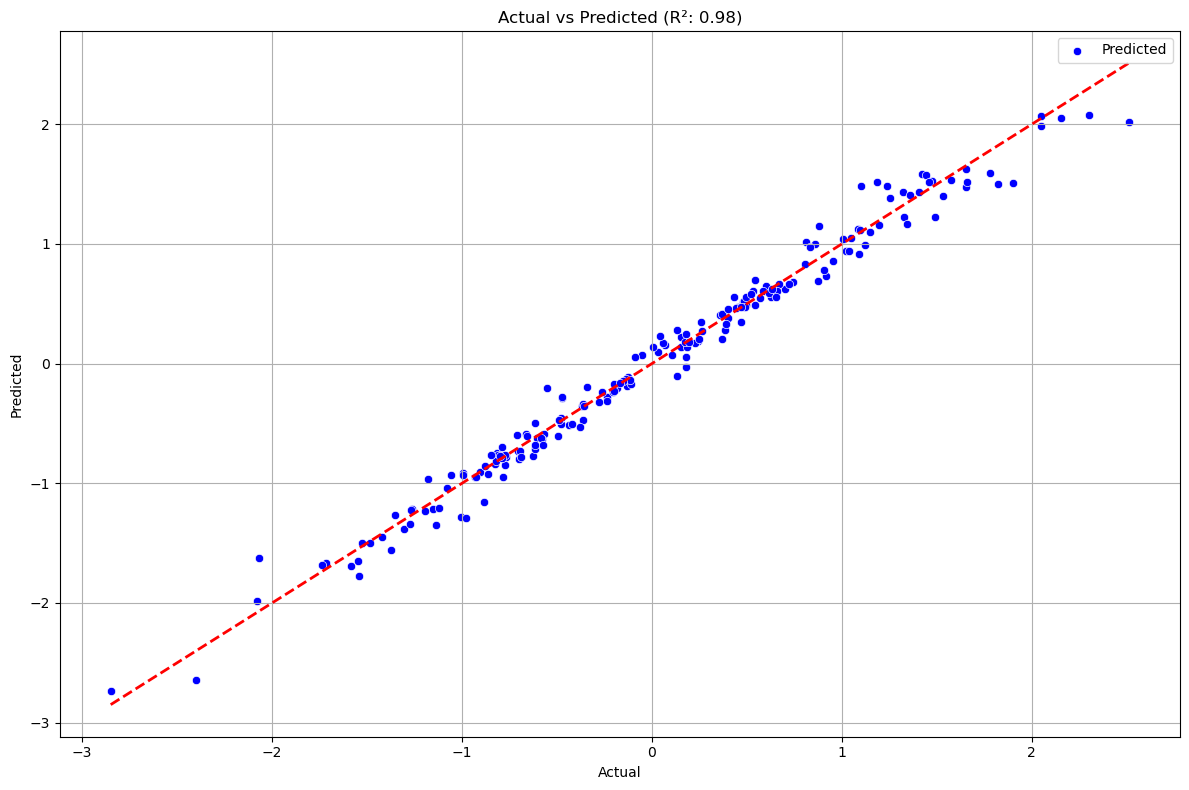

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(x=Y_test, y=Y_predCV, ax=ax, color='blue', label='Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted (R²: {r2_score(Y_test, Y_pred):.2f})')
plt.grid(True)
plt.tight_layout()

## Residual plot

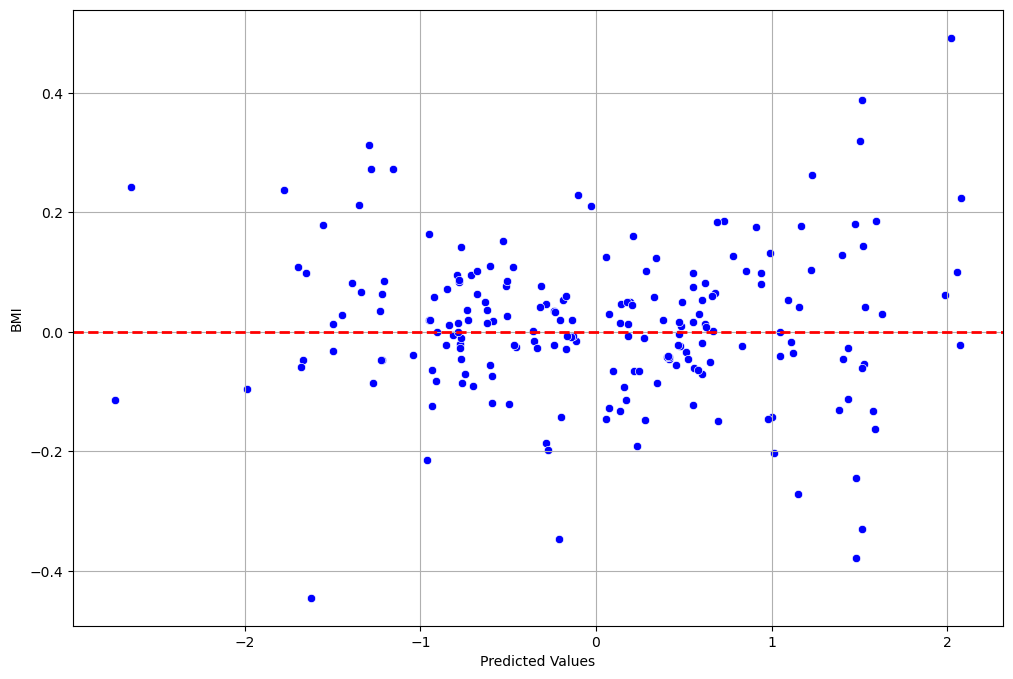

In [27]:
residuals = Y_test - Y_predCV

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=Y_predCV, y=residuals, ax=ax, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')  
plt.grid(True)

## Feature Importance

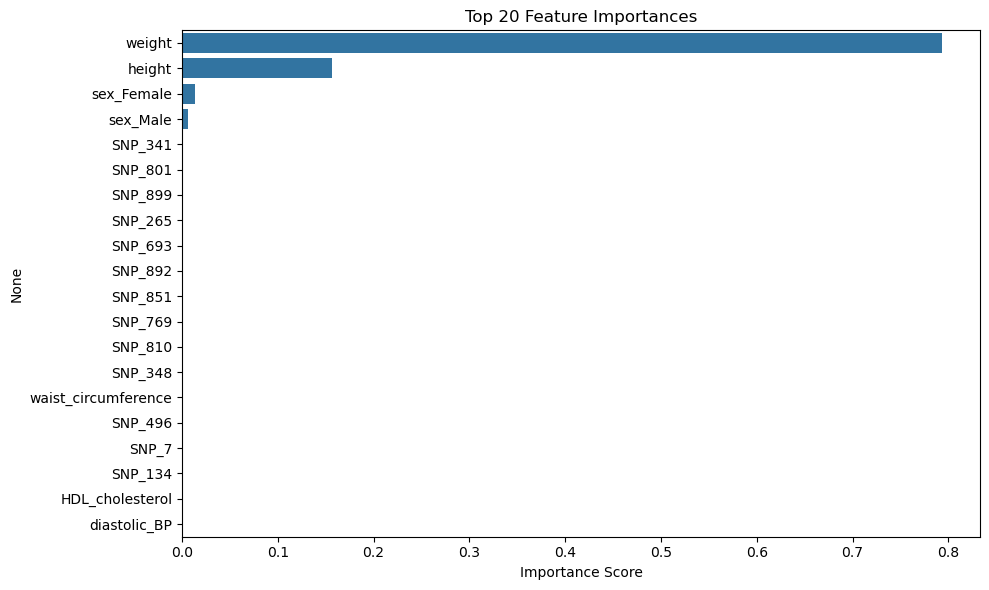

In [23]:
feature_importance = pd.Series(rfr_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [34]:
import joblib

# Save the model
joblib.dump(rfr_model, 'bmi_rf_model.pkl')

joblib.dump(X_train.columns.tolist(), "training_columns.pkl")
# Save the scaler


# Save feature names to ensure consistency
joblib.dump(list(X.columns), 'features.pkl')

['features.pkl']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()